<a href="https://colab.research.google.com/github/gopikrishna2313/cs666student/blob/main/CS666_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

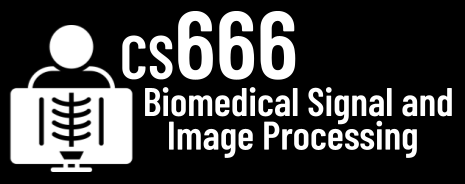
#Assignment 5

In [1]:
# NAME: Gopi Krishna Nathani

In [2]:
# In this assignment, we will visualize and explore a CT scan!

In [3]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# we are using pydicom, so lets install it!
!pip install pydicom

**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [5]:
# Use wget to download https://cs666.org/data/ct.zip!
# This is a CT scan of an arm in DICOM format.

In [6]:
# TODO: YOUR CODE
!wget https://cs666.org/data/ct.zip

--2024-04-16 03:20:35--  https://cs666.org/data/ct.zip
Resolving cs666.org (cs666.org)... 185.199.110.153, 185.199.111.153, 185.199.108.153, ...
Connecting to cs666.org (cs666.org)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5847706 (5.6M) [application/zip]
Saving to: ‘ct.zip.7’

ct.zip.7            100%[===================>]   5.58M  --.-KB/s    in 0.02s   

2024-04-16 03:20:35 (227 MB/s) - ‘ct.zip.7’ saved [5847706/5847706]



In [7]:
# Then use the following snippet to extract the data.

In [8]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [9]:
# 1) Let's explore the data using the Files panel on the left.
# TODO: How many slices are there?

In [10]:
# TODO: 220 slicers

In [11]:
# 2) Let's visualize the data with SliceDrop!
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [12]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

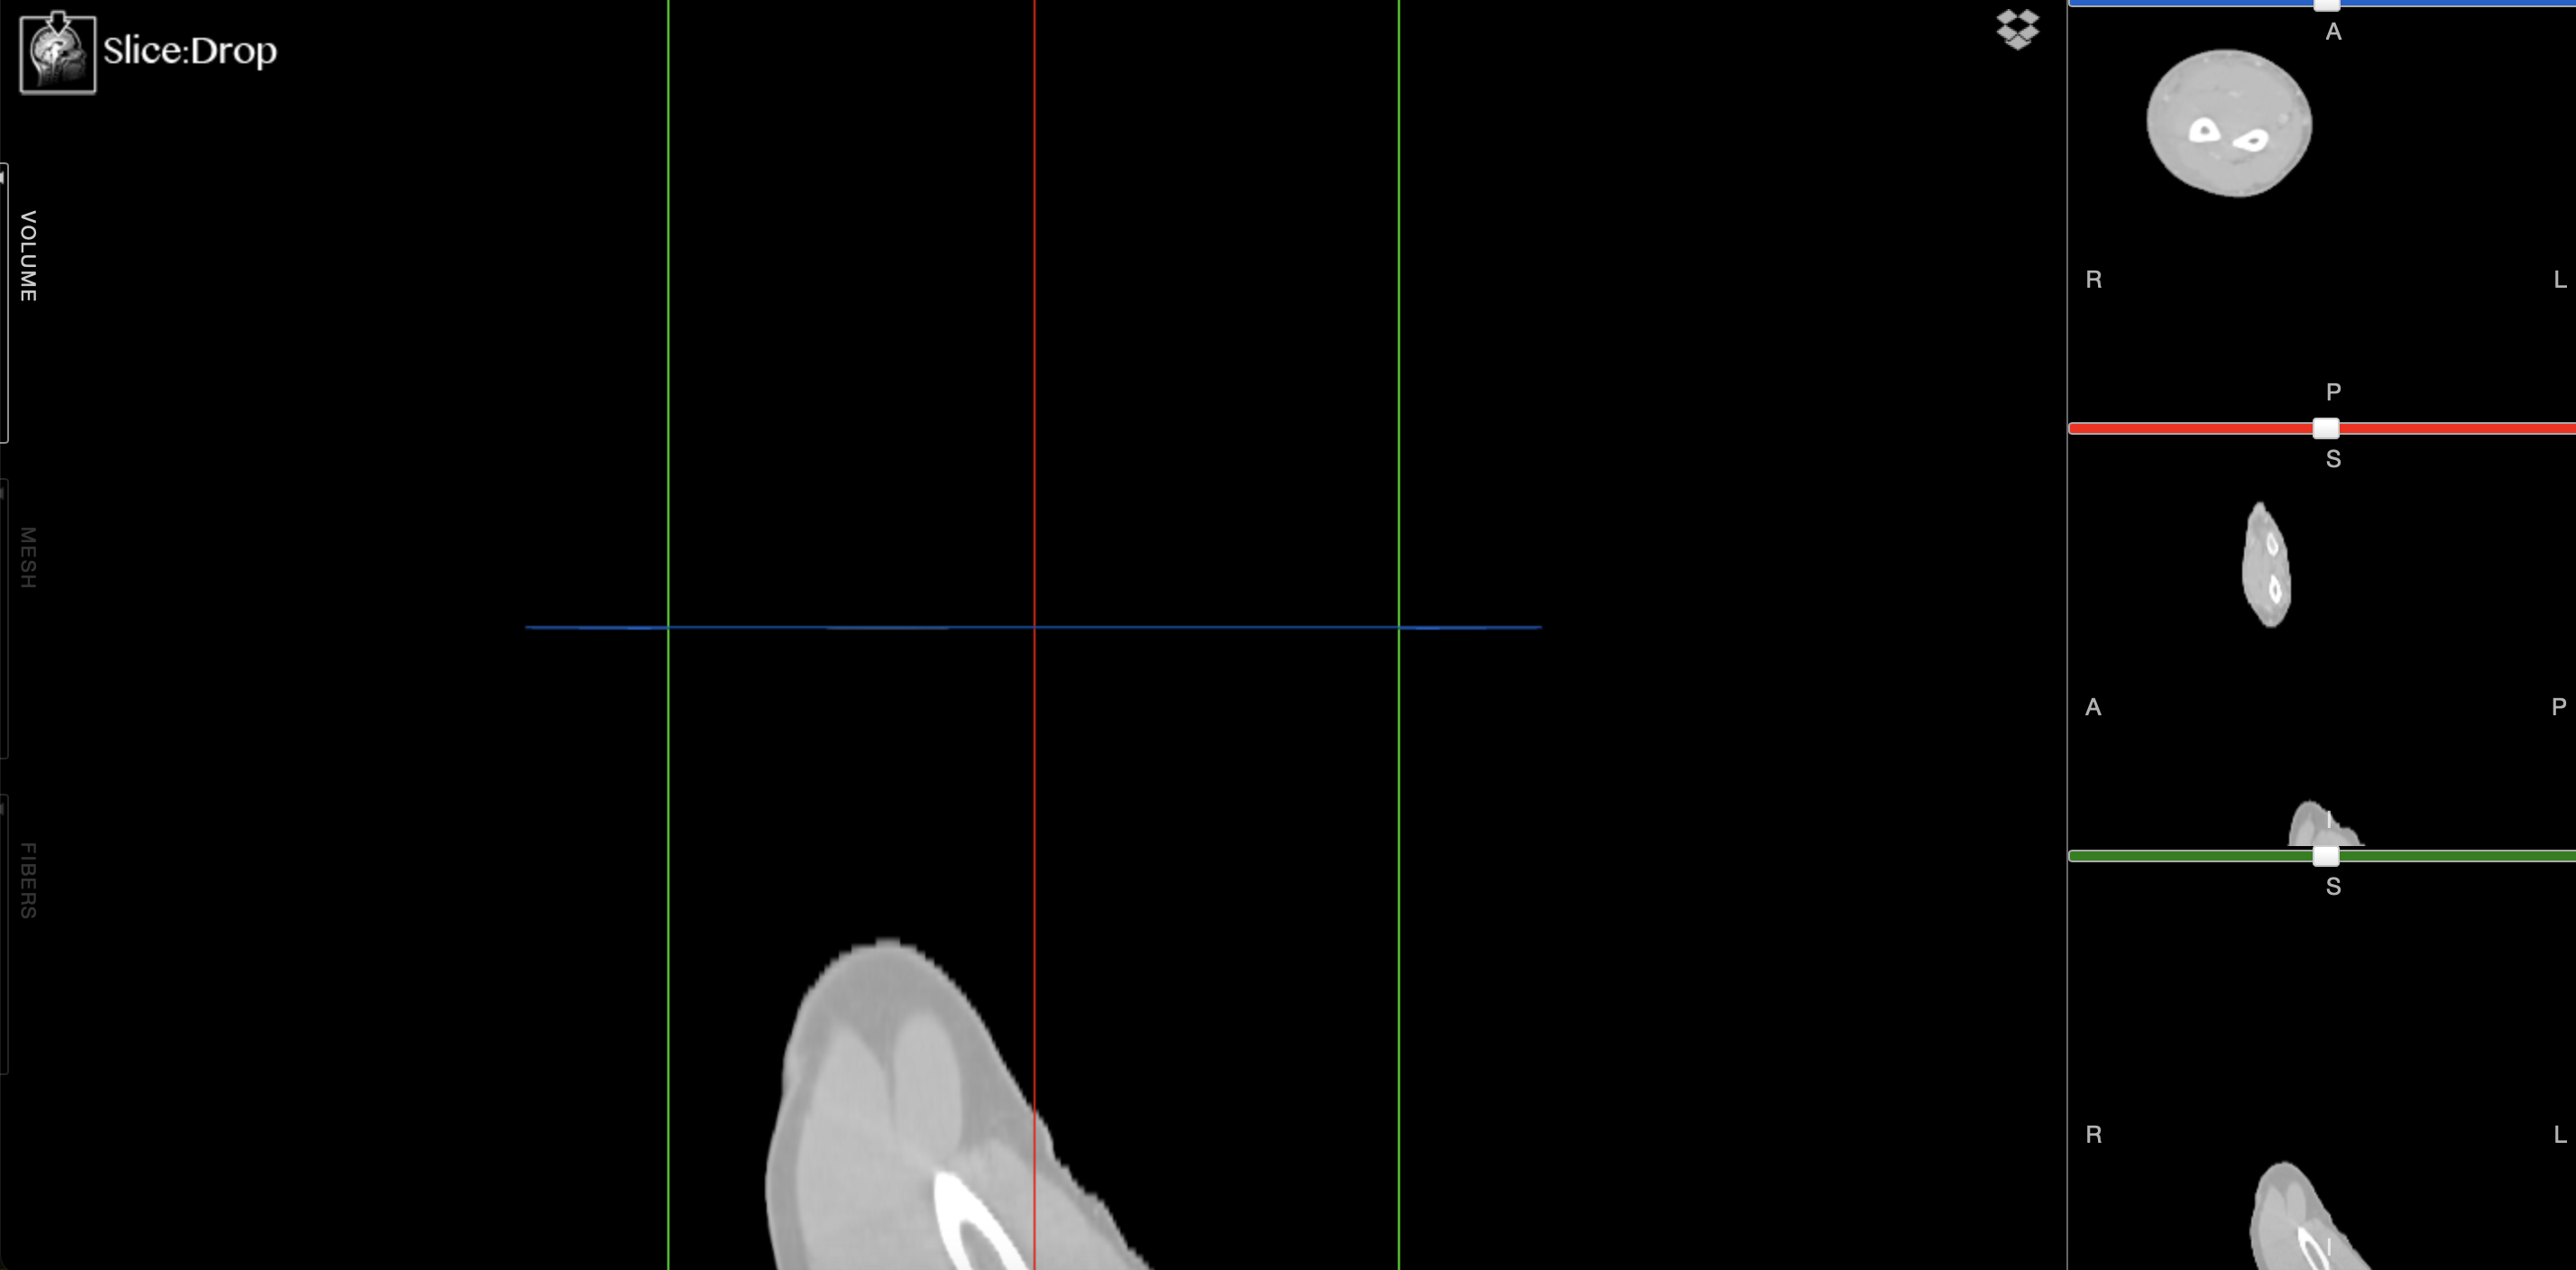

In [13]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [14]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by
# using the Upload image button after double-click.

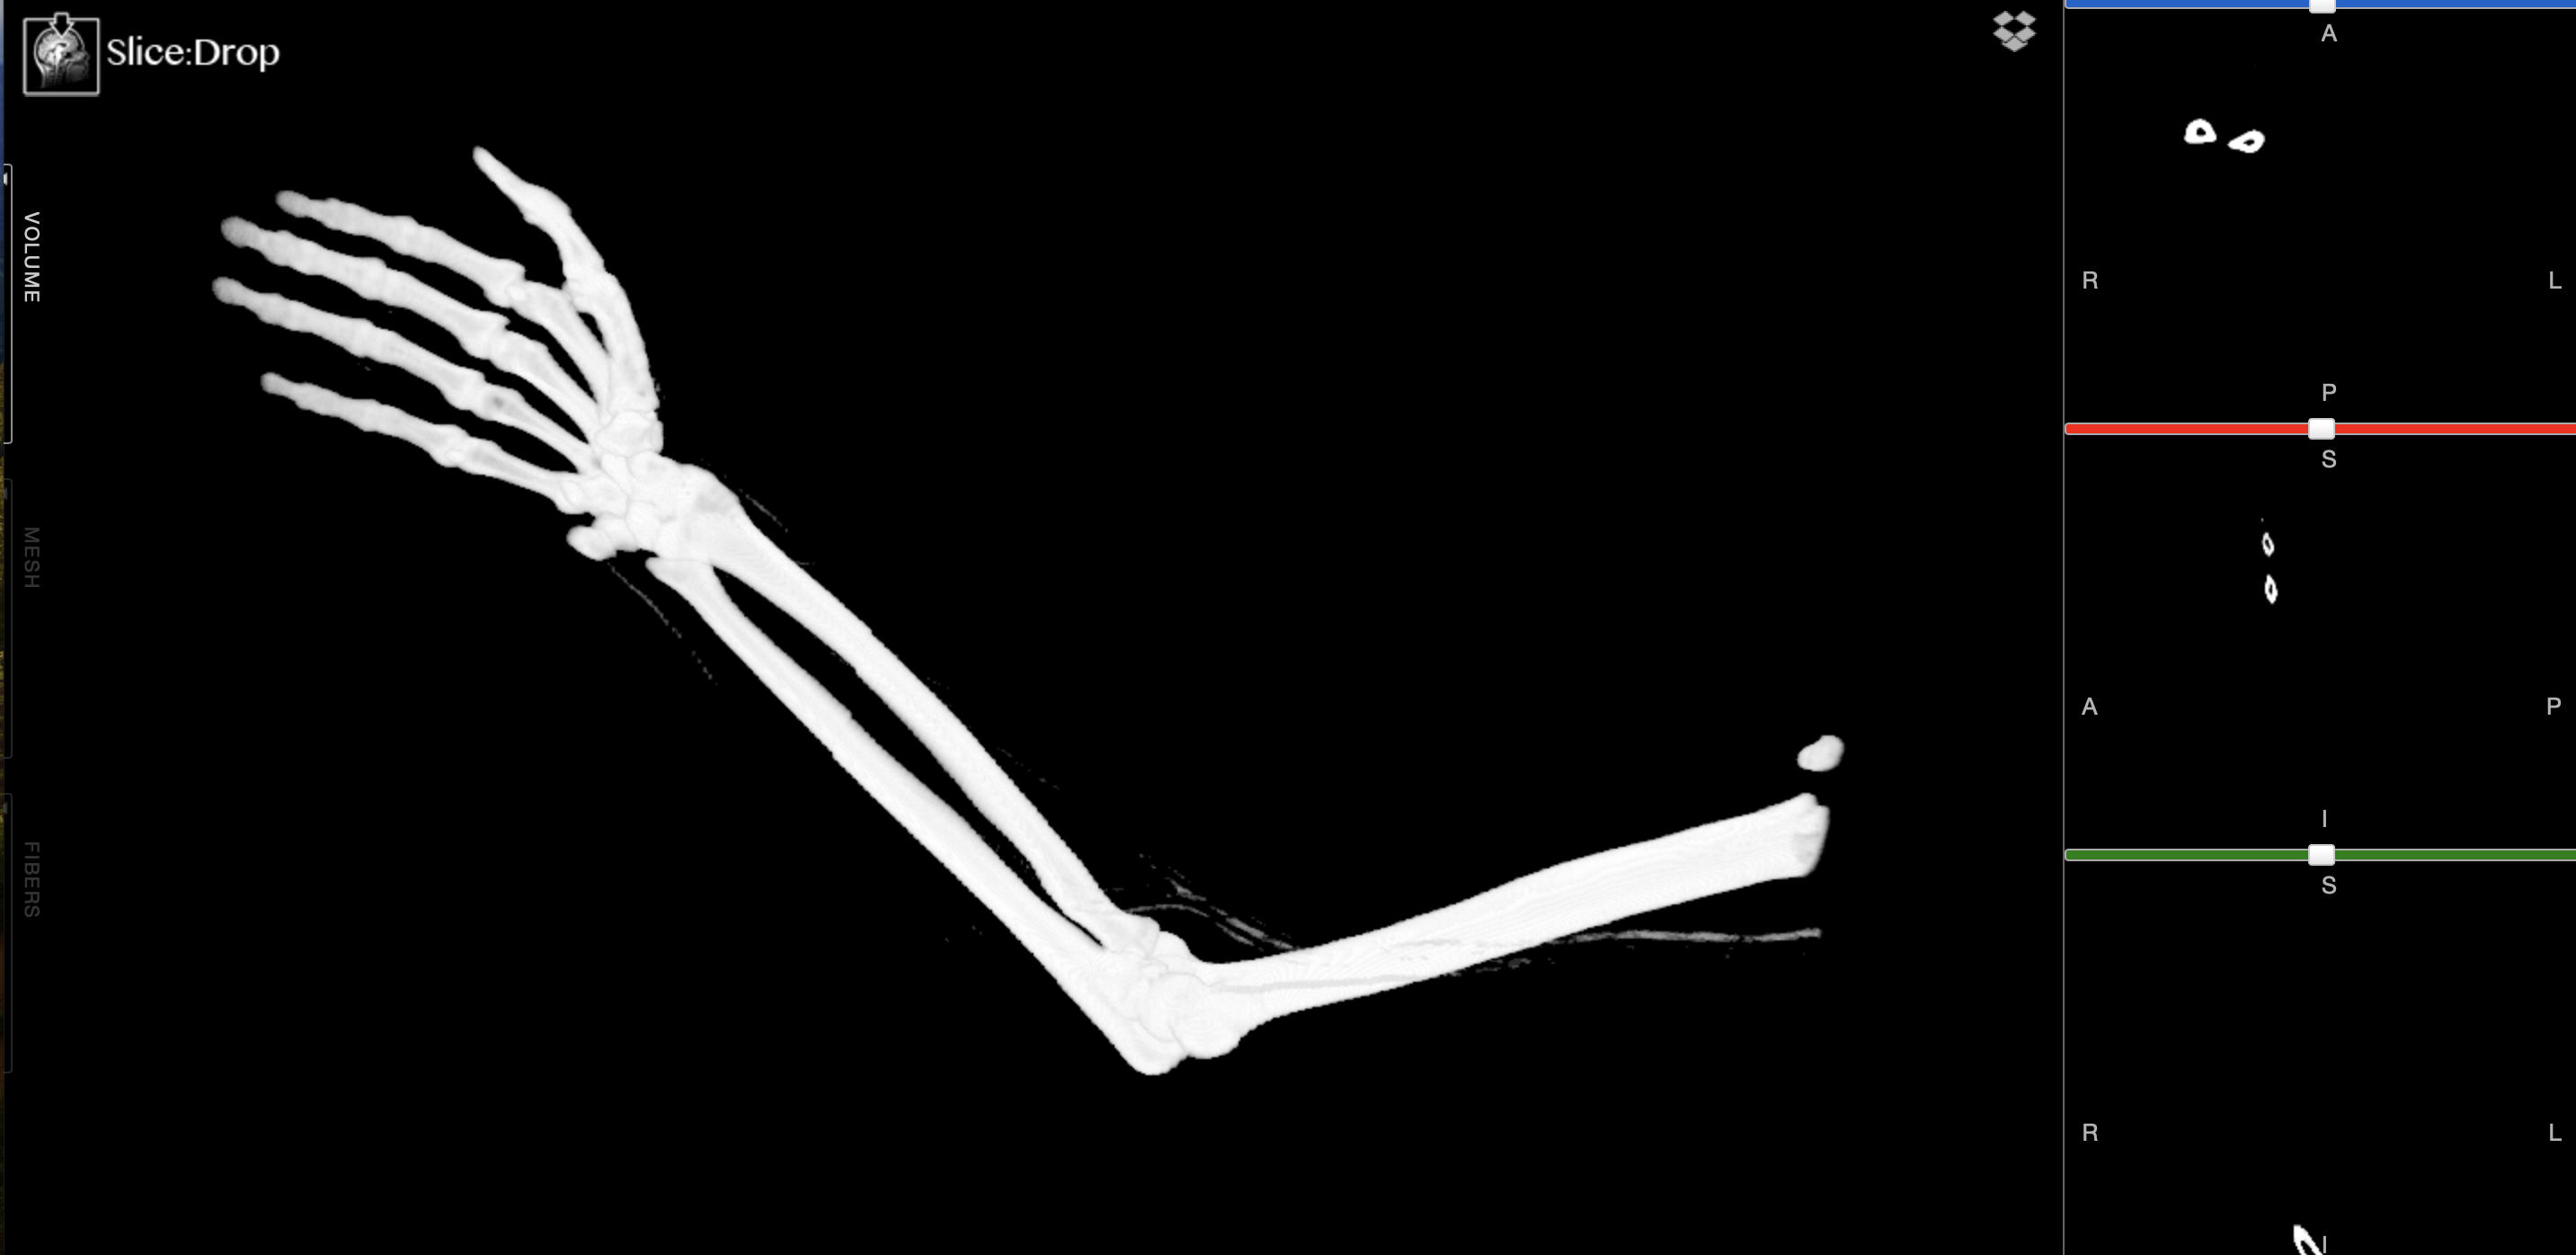

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [15]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [16]:
from pydicom import dcmread

In [17]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY

import os
import numpy as np
from pydicom import dcmread

directory = "ct"

dcm_file_names = os.listdir(directory)
dcm_file_names.sort()

pixel_data_list = []
dicom_files = []

for file_name in dcm_file_names:

    file_path = os.path.join(directory, file_name)


    dicom_file = dcmread(file_path)
    dicom_files.append(dicom_file)


    pixel_data_list.append(dicom_file.pixel_array)

image_volume = np.array(pixel_data_list)

print(image_volume.shape)


(220, 454, 512)


In [18]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

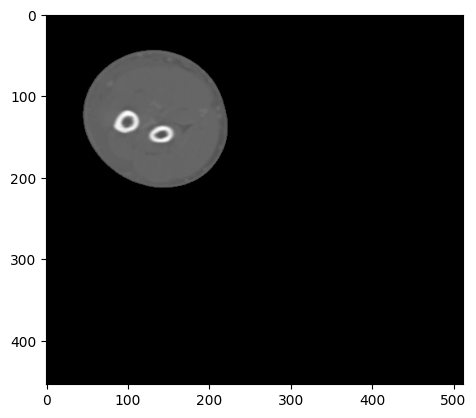

In [19]:
# TODO: YOUR CODE FOR AXIAL
plt.imshow(image_volume[120,:,:],cmap='gray')

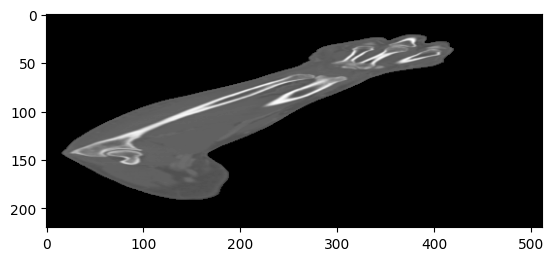

In [20]:
# TODO: YOUR CODE FOR SAGITTAL
plt.imshow(image_volume[:,120,:],cmap='gray')

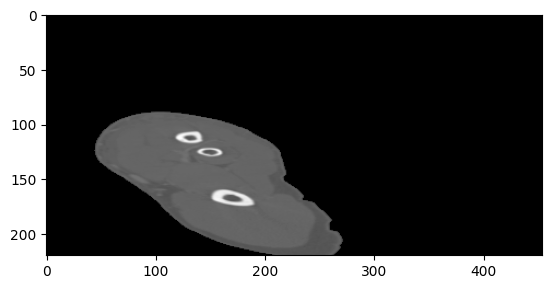

In [21]:
# TODO: YOUR CODE FOR CORONAL
plt.imshow(image_volume[:,:,120],cmap='gray')

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [22]:
# We will now enhance the visualization from above by performing
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [23]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [24]:
# level = numpy_3D_array[0][(0x0028,0x1050)].value
# print("Window Center = ",level)

# window = dcm_list[0][(0x0028,0x1051)].value
# print("Window Width = ",window)

# rescale = dcm_list[0][(0x0028,0x1052)].value
# print("Rescale Intercept = ",rescale)

# vmin = level - window/2
# vmax = level + window/2
# plt.imshow(numpy_3D_array[110] + rescale, cmap='gray', vmin=vmin, vmax=vmax)
# plt.show()

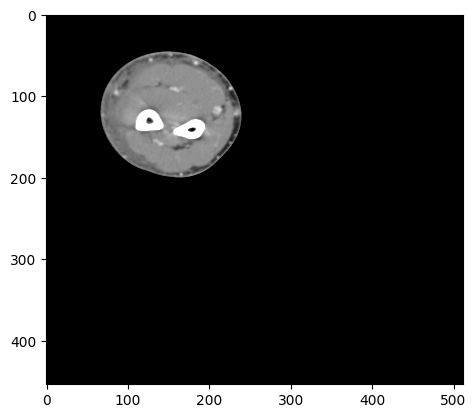

In [25]:
# TODO: YOUR CODE
window_center = dicom_file[(0x0028, 0x1050)].value
window_width = dicom_file[(0x0028, 0x1051)].value
rescale_intercept = dicom_file[(0x0028, 0x1052)].value


vmin = window_center - window_width / 2
vmax = window_center + window_width / 2

plt.imshow(image_volume[110]  + rescale_intercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()


In [26]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

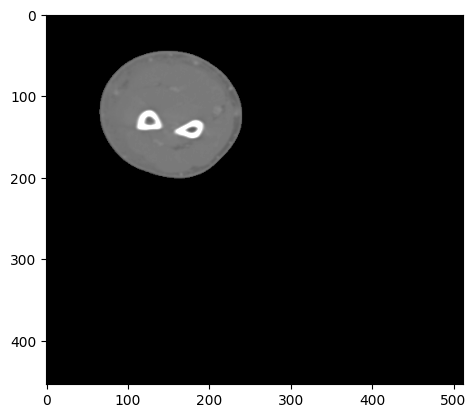

In [27]:
# TODO: YOUR CODE
window = 2000
level = 100

vmin = level - window/2
vmax = level + window/2
plt.imshow(image_volume[110] + rescale_intercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

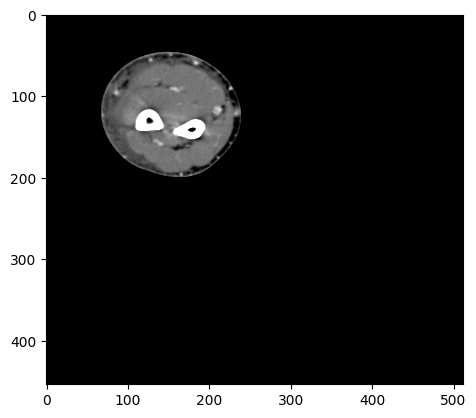

In [28]:
window = 300
level = 70

vmin = level - window/2
vmax = level + window/2
plt.imshow(image_volume[110] + rescale_intercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

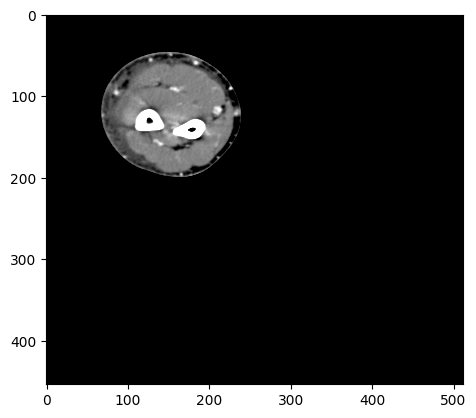

In [29]:
window = 210
level = 55

vmin = level - window/2
vmax = level + window/2
plt.imshow(image_volume[110] + rescale_intercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

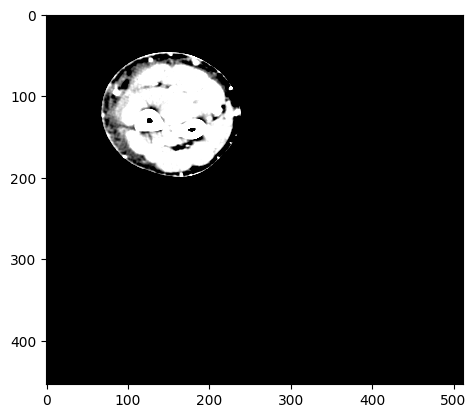

In [30]:
window = 60
level = 21

vmin = level - window/2
vmax = level + window/2
plt.imshow(image_volume[110] + rescale_intercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [31]:
# Which values make sense and why?

In [32]:
# TODO: Using window = 210 and level = 55 is meaningful. Changing the window and level parameters improves the brightness and contrast of medical photos. In comparison to other options, window = 200 and level = 50 provide clear visibility.


**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [33]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

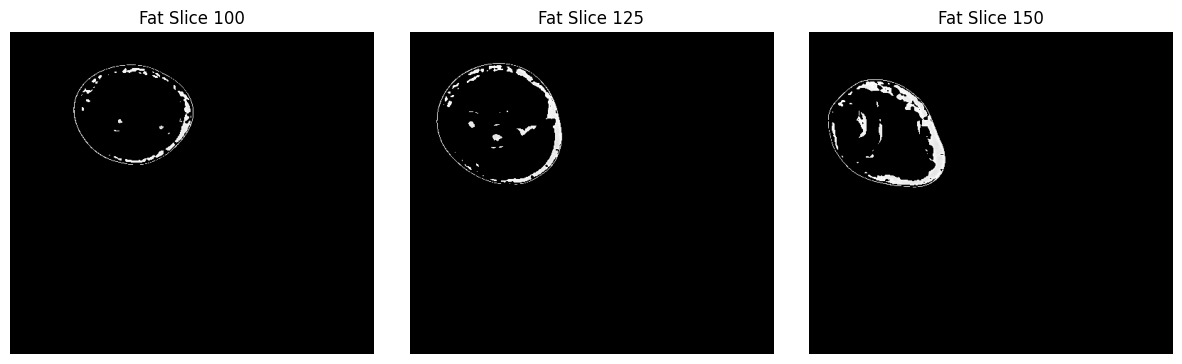

In [34]:
# TODO: YOUR CODE TO SEGMENT FAT
fat_range =  (800, 1000)
fat_mask = np.zeros_like(image_volume, dtype=np.int16)
fat_mask = np.where(np.logical_and(image_volume >= fat_range[0], image_volume <= fat_range[1]), image_volume, fat_mask)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i in range(3):
    slice_index = 100 + i * 25
    axes[i].imshow(fat_mask[slice_index, :, :], cmap='gray')
    axes[i].set_title(f'Fat Slice {slice_index}')
    axes[i].axis('off')

plt.show()


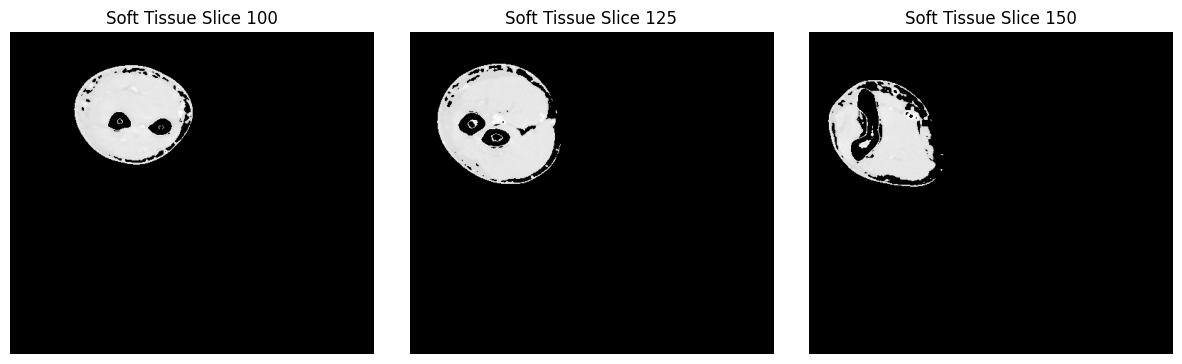

In [35]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE

soft_tissue_range =  (1000, 1200)


soft_tissue_mask = np.zeros_like(image_volume, dtype=np.int16)
soft_tissue_mask = np.where(np.logical_and(image_volume >= soft_tissue_range[0], image_volume <= soft_tissue_range[1]), image_volume, soft_tissue_mask)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i in range(3):
    slice_index = 100 + i * 25
    axes[i].imshow(soft_tissue_mask[slice_index, :, :], cmap='gray')
    axes[i].set_title(f'Soft Tissue Slice {slice_index}')
    axes[i].axis('off')

plt.show()

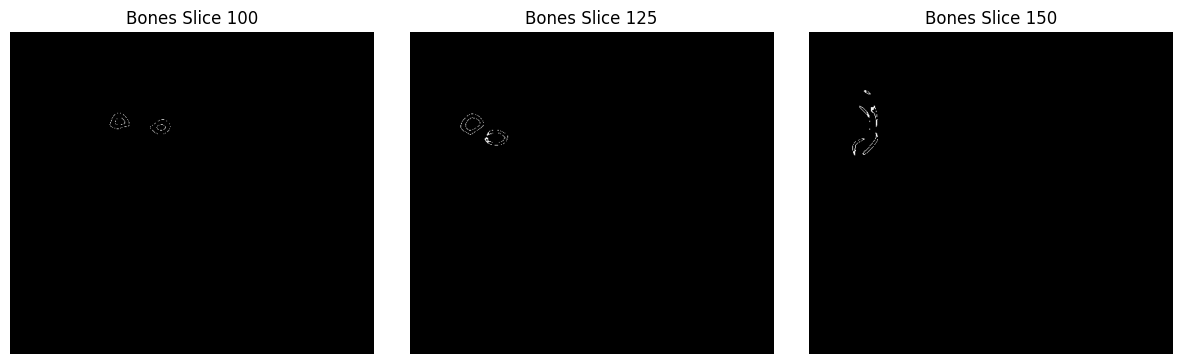

In [36]:
# TODO: YOUR CODE TO SEGMENT BONES
bones_range =  (1900, 2100)

bones_mask = np.zeros_like(image_volume, dtype=np.int16)
bones_mask = np.where(np.logical_and(image_volume >= bones_range[0], image_volume <= bones_range[1]), image_volume, bones_mask)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i in range(3):
    slice_index = 100 + i * 25
    axes[i].imshow(bones_mask[slice_index, :, :], cmap='gray')
    axes[i].set_title(f'Bones Slice {slice_index}')
    axes[i].axis('off')

plt.show()

In [37]:
# Are the segmentations good?

In [38]:
# TODO: Yes

In [39]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""